## CNN 練習實作

### 導入套件

In [10]:
import numpy as np
import struct
import gzip
import os
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt


### 讀取資料集

In [7]:
def load_mnist(path, kind='train'):
    # gz壓縮檔處理
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels
train_images, train_labels = load_mnist('Dataset', kind='train')
test_images, test_labels = load_mnist('Dataset', kind='t10k')


### 資料前處理

In [8]:
# 標準化
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
# 進行One-hot編碼
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


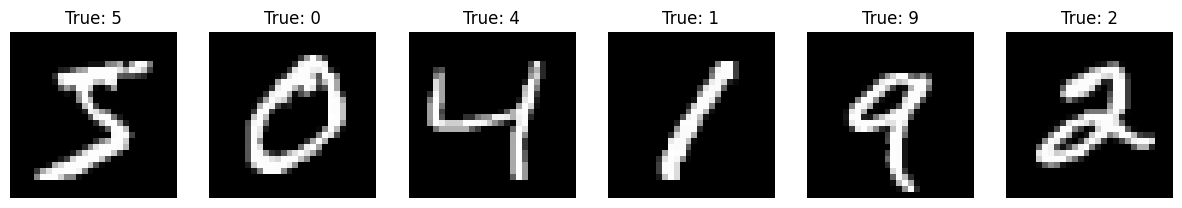

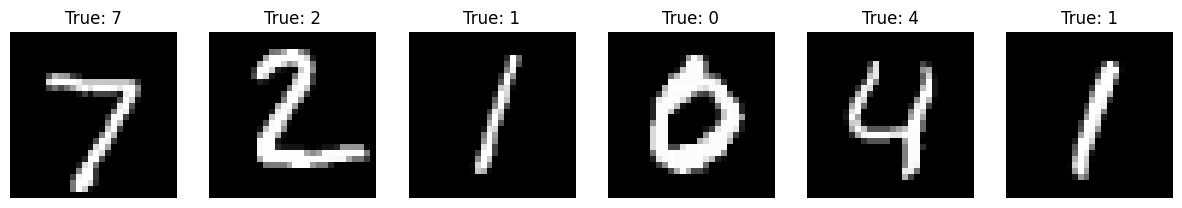

In [16]:
def plot_images(images, labels, predictions=None):
    fig, axes = plt.subplots(1, 6, figsize=(15, 3))
    for i in range(6):
        ax = axes[i]
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        if predictions is None:
            ax.set_title(f'True: {np.argmax(labels[i])}')
        else:
            ax.set_title(f'True: {np.argmax(labels[i])}, Pred: {np.argmax(predictions[i])}')
        ax.axis('off')
    plt.show()

# 顯示部分訓練圖片
plot_images(train_images, train_labels)

# 顯示部分測試圖片
plot_images(test_images, test_labels)

### 建立模型

In [17]:
# 構建模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
# Compile模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### 評估模型 (* 未經訓練)

In [18]:
# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# 顯示部分預測結果
predictions = model.predict(test_images[:5])
print("Predictions: ", np.argmax(predictions, axis=1))
print("True labels: ", np.argmax(test_labels[:5], axis=1))


313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1365
Test accuracy: 0.1365
1/1 [==============================] - 0s 36ms/step
Predictions:  [7 7 6 7 6]
True labels:  [7 2 1 0 4]


### 訓練模型 & 再次評估

In [19]:
# 訓練模型
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))
# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# 顯示部分預測結果
predictions = model.predict(test_images[:5])
print("Predictions: ", np.argmax(predictions, axis=1))
print("True labels: ", np.argmax(test_labels[:5], axis=1))


Epoch 1/10
469/469 [==============================] - 11s 23ms/step - loss: 1.2434 - accuracy: 0.5796 - val_loss: 0.4035 - val_accuracy: 0.8821
Epoch 2/10
469/469 [==============================] - 11s 23ms/step - loss: 0.4681 - accuracy: 0.8564 - val_loss: 0.2432 - val_accuracy: 0.9272
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.3407 - accuracy: 0.8971 - val_loss: 0.1787 - val_accuracy: 0.9484
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2694 - accuracy: 0.9199 - val_loss: 0.1324 - val_accuracy: 0.9582
Epoch 5/10
469/469 [==============================] - 11s 22ms/step - loss: 0.2280 - accuracy: 0.9330 - val_loss: 0.1141 - val_accuracy: 0.9649
Epoch 6/10
469/469 [==============================] - 11s 22ms/step - loss: 0.2013 - accuracy: 0.9411 - val_loss: 0.1018 - val_accuracy: 0.9683
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1796 - accuracy: 0.9474 - val_loss: 0.0933 - val_accuracy:

## 完整版

In [5]:
import numpy as np
import struct
import gzip
import os
import tensorflow as tf
from tensorflow.keras import layers, models

# 讀取MNIST
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

train_images, train_labels = load_mnist('Dataset', kind='train')
test_images, test_labels = load_mnist('Dataset', kind='t10k')

train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

# 顯示部分預測結果
predictions = model.predict(test_images[:5])
print("Predictions: ", np.argmax(predictions, axis=1))
print("True labels: ", np.argmax(test_labels[:5], axis=1))


Epoch 1/10
469/469 [==============================] - 12s 24ms/step - loss: 0.2919 - accuracy: 0.9113 - val_loss: 0.0636 - val_accuracy: 0.9795
Epoch 2/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0945 - accuracy: 0.9718 - val_loss: 0.0429 - val_accuracy: 0.9865
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0672 - accuracy: 0.9798 - val_loss: 0.0397 - val_accuracy: 0.9865
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0541 - accuracy: 0.9840 - val_loss: 0.0313 - val_accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0478 - accuracy: 0.9857 - val_loss: 0.0291 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.0273 - val_accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0233 - val_accuracy: